In [1]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np
import tqdm
from collections import Counter
from itertools import chain
import copy

In [2]:
img = cv2.imread("image.jpg")
img = imutils.resize(img, width=1024)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

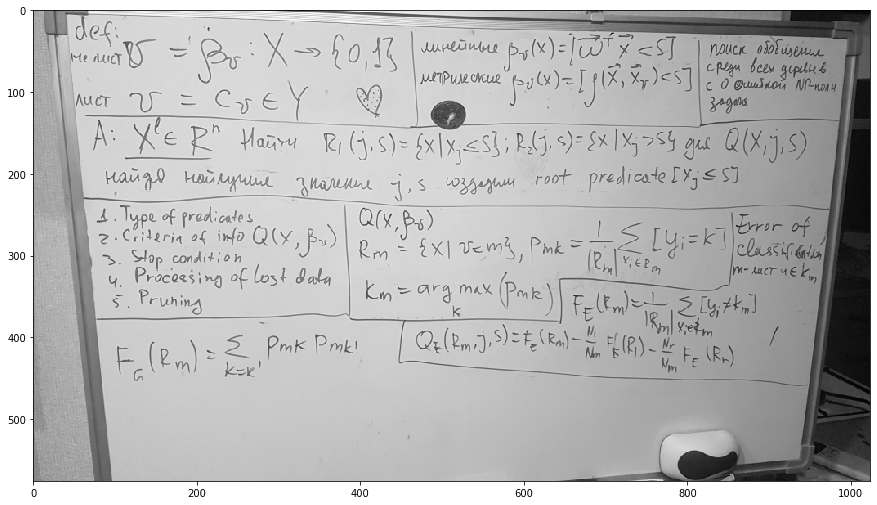

In [3]:
plt.figure(figsize=(15,15))
plt.imshow(img, cmap="gray")

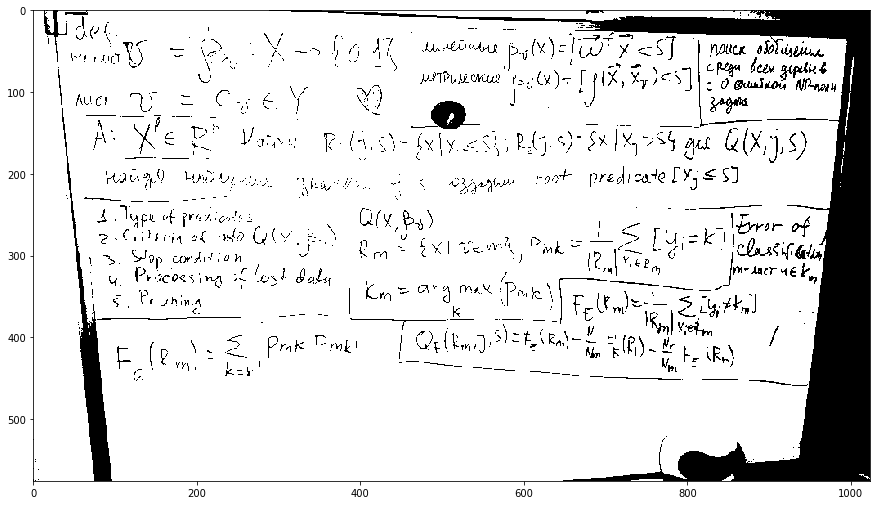

In [4]:
# print(img[:10])
bin_img = (img/255>0.5).astype(np.int)
plt.figure(figsize=(15,15))
plt.imshow(bin_img,cmap="gray")

In [5]:
height = bin_img.shape[0]
width = bin_img.shape[1]
c2ind = lambda y,x: y*width+x
ind2c = lambda ind: (ind//width,ind%width)

In [6]:
res = np.where(bin_img==0)

In [7]:
zero_pairs=set(zip(res[0],res[1]))

In [8]:
zero_inds = set([c2ind(y,x) for y,x in zero_pairs])

In [9]:
class MyDisjointSet():
    def __init__(self):
        self.A = {}
        self.rank = {}  
        
    def find(self, v):
        if self.A[v] != v :
            self.A[v] = self.find(self.A[v])
        return self.A[v]
    
    def makeSet(self, i):        
        self.A[i] = i  
        self.rank[i] = 0

    def union(self,p,q):
        root1 = self.find(p);
        root2 = self.find(q);
        if root1 != root2 :  
            if self.rank[root1] > self.rank[root2] :
                self.A[root2] = root1
            else :
                self.A[root1] = root2
                if self.rank[root1] == self.rank[root2] :
                    self.rank[root2] += 1
            
    def iterSets(self):
        sets = set(self.A.values())
        iter_sets = []
        for set_ in tqdm.tqdm(sets):
            seed = set()
            for key in self.A.keys():
                if (self.A[key] == set_):
                    seed.add(key)
            iter_sets.append(seed)
        return iter_sets, self.A
            
    

In [10]:
ds = MyDisjointSet()

In [11]:
for ind in zero_inds:
    ds.makeSet(ind)

In [12]:
for y,x in tqdm.tqdm(zero_pairs):
    for dy in range(-1,2):
        for dx in range(-1,2):
            if (dx!=0 or dy!=0) and (y+dy,x+dx) in zero_pairs:
                ds.union(c2ind(y,x),c2ind(y+dy,x+dx)) 


100%|██████████| 73883/73883 [00:02<00:00, 29690.92it/s]


In [13]:
iterSets = ds.iterSets()

100%|██████████| 1757/1757 [00:20<00:00, 84.99it/s]


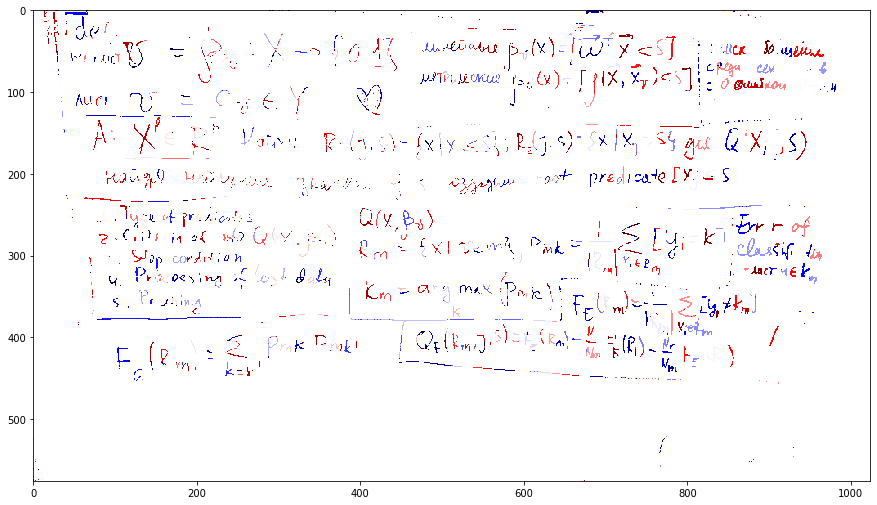

In [14]:
from matplotlib import cm
fltr_img = np.ones(shape=(height,width,4))
sets_size = len(list(iterSets[0]))
mycm = cm.get_cmap("seismic",sets_size)

for num_set,els in enumerate(iterSets[0]):
    if len(els)<270:
        for ind in els:
            fltr_img[(ind2c(ind))] = mycm(num_set) 

plt.figure(figsize=(15,15))
plt.imshow(fltr_img)    

# Homework
* Написать функцию расчета периметра для связанных множеств в ds.itersets()
* Написать фунцию фильтрации на основе периметра
* Построить словарь соотношения площади к периметру(или наоборот) и визуализировать какие объекты попали в этом словарь


a*a/4*a = a/4

pi*r^2/2*pi*r = r/2

h*a/2 / (a+b+c) = ?

[0, C] => [0,1]

[0,0.3]; => viz
[0.3,0.6]; => viz
[0.6,1]; => viz
